# Pymaceuticals Inc.
---

### Analysis
The bar graphs indicate that Capomulin was the most effective drug, impacting the highest number of mice, while Propriva was less effective, affecting fewer mice.

Although the difference is small, the pie charts reveal that male mice were affected slightly more (50.6%) than female mice (49.4%).

The data also shows a correlation between mouse weight and tumor size. As the mice gain weight, their tumors tend to increase in size as well.

Overall, the data suggests that Capomulin is more effective at reducing tumor size compared to Propriva.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df=pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
merge_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice.
mice_amount=merge_df["Mouse ID"].nunique()
mice_amount

249

In [83]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice=dup_mice_ID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID
dup_mice

array(['g989'], dtype=object)

In [84]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_df = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merge_df[merge_df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
# Checking the number of mice in the clean DataFrame.
clean_df=clean_df["Mouse ID"].nunique()
clean_df


248

## Summary Statistics

In [88]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_df=merge_df

mean=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()


summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

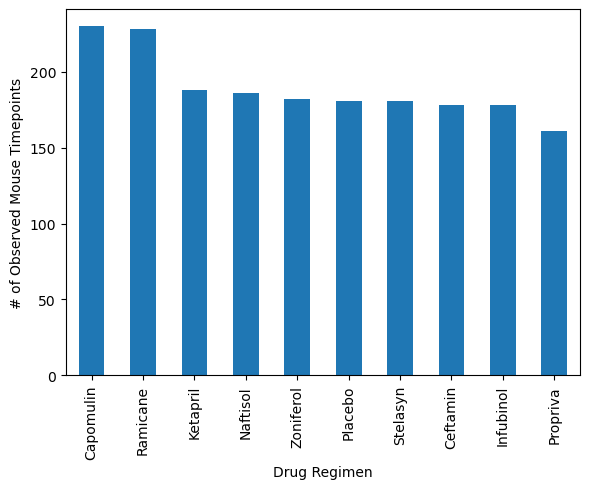

In [118]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_count = clean_df.groupby("Drug Regimen").size().sort_values(ascending=False)

drug_count.plot(kind='bar', color="tab:blue", figsize=(6,5))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout() 
plt.show() 

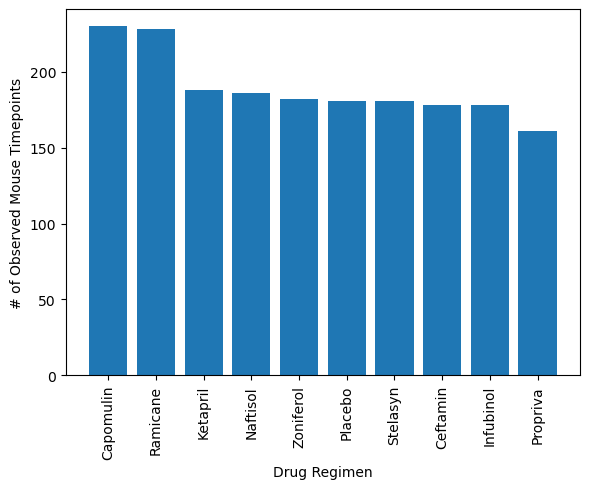

In [138]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_count = clean_df.groupby("Drug Regimen").size().sort_values(ascending=False)

plt.figure(figsize=(6, 5))
plt.bar(drug_count.index, drug_count.values, color="tab:blue") 

plt.xticks(rotation=90, ha='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout() 
plt.show() 

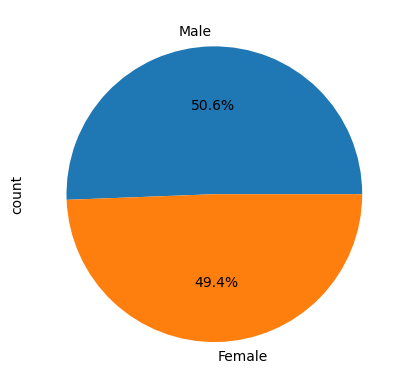

In [150]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")

# Make the pie chart
plt.show()


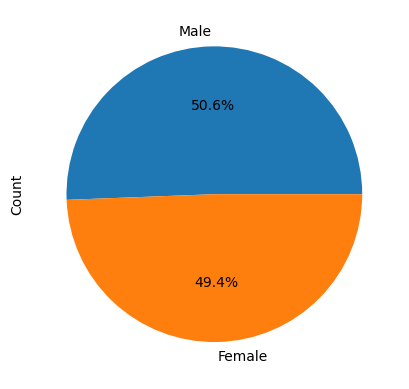

In [152]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Count')

# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")


In [191]:
# Define the list of treatments for the loop and later for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
final_tumor_vol = []

# Create a dictionary to store outliers for each treatment
outliers_dict = {}

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = clean_df[clean_df['Drug Regimen'] == drug]
    tumor_volumes = treatment_df['Tumor Volume (mm3)']
    final_tumor_vol.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    
    outliers_dict[drug] = outliers

for drug, outliers in outliers_dict.items():
    print(f"Outliers for {drug}:")
    print(outliers)
   




Outliers for Capomulin:
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ramicane:
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Outliers for Infubinol:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


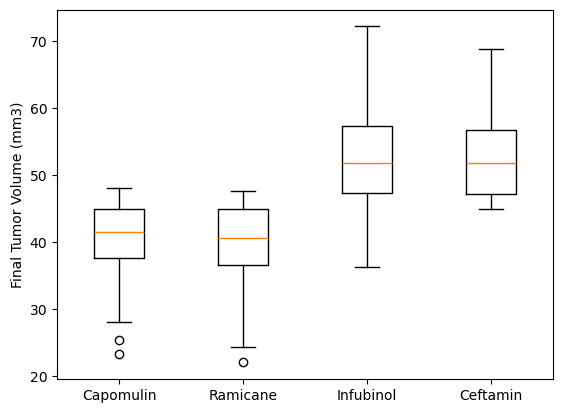

In [209]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
Capomulin_tumors = Capomulin_df["Tumor Volume (mm3)"]
Ramicane_tumors = Ramicane_df["Tumor Volume (mm3)"]
Infubinol_tumors = Infubinol_df["Tumor Volume (mm3)"]
Ceftamin_tumors = Ceftamin_df["Tumor Volume (mm3)"]

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

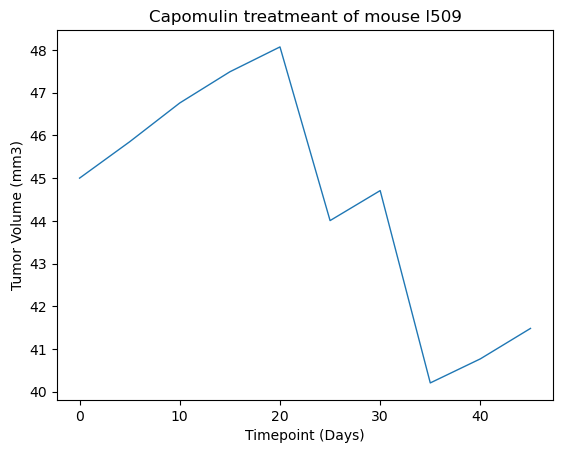

In [221]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
scatter_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
scatter_df.head()

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumsiz, linewidth=1,color="tab:blue")
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

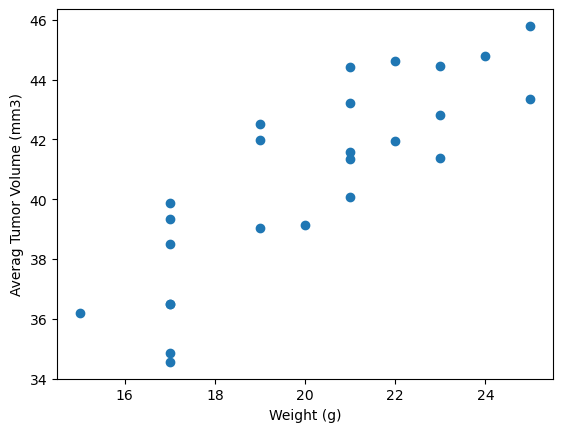

In [248]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_avg_vol = Capomulin_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

fig1, ax1 = plt.subplots()

marker_size=15
plt.scatter(cap_avg_vol['Weight (g)'],cap_avg_vol['Tumor Volume (mm3)'], color="tab:blue")
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

Correlation between mouse weight and the average tumor volume is 0.84


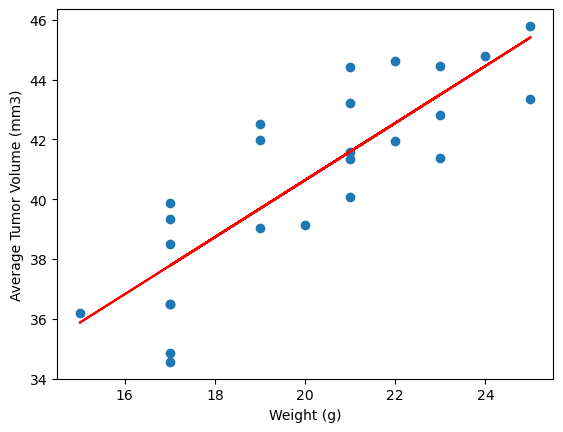

In [266]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

cap_avg_vol = Capomulin_df.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

x = cap_avg_vol['Weight (g)']
y = cap_avg_vol['Tumor Volume (mm3)']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regress_values = slope * x + intercept

line_eq = f"y = {slope:.2f} x + {intercept:.2f}"

fig, ax = plt.subplots()
ax.scatter(x, y, color='tab:blue')
ax.plot(x, regress_values, color='red')

ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')

print('Correlation between mouse weight and the average tumor volume is 0.84')
plt.show()